# Análise de Venda de Produtos

## 1. Introdução do problema

A análise de venda de produtos é muito importante para extrair insights para futuras vendas, tendências de mercado, entre outros pontos que é essencial para o crescimento da empresa. Nesse sentido, esse notebook tem o objetivo de analisar os dados de uma empresa com relação à venda de produtos e tirar insights.

Os dados foram retirados do Kaggle em https://www.kaggle.com/datasets/knightbearr/sales-product-data

### Informações sobre os dados

* **Order ID** : Número da ordem do pedido
* **Product** : Descrição do produto
* **Quantity Ordered** : Quantidade de produtos vendidos 
* **Price Each** : Preço de cada produto (dólares)
* **Order Date** : Data que o cliente pediu o produto
* **Purchase Address** : Endereço de compra

São 12 tabelas de produtos, 1 para cada mês do ano de 2019.


### Questões para serem respondidas

Nesse notebook iremos responder as seguintes questões que estão no perfil do Kaggle:

a) Quanto foi vendido no ano de 2019?\
b) Qual o melhor mês para as vendas? Quanto foi vendido nesse mês?\
c) Qual a cidade com maior número de vendas?\
d) A que horas devem exibir os anúncios para maximizar a probabilidade do cliente comprar o produto?\
e) Quais produtos são mais vendidos juntos?\
f) Qual produto vende mais? Por que você achou que ele vende mais?

## 2. Importando dataset e bibliotecas

In [1]:
# Para a regra de associação de produtos
#! pip install mlxtend
#! pip install xlrd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import datetime
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Combinando os arquivos em 1 só 
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
sales_data = pd.concat([pd.read_csv(f) for f in all_filenames ])

#exportar para csv
sales_data.to_csv( "All_Data_Sales.csv", index=False, encoding='utf-8-sig')

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
sales_data.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
sales_data.tail()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [5]:
sales_data.shape

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(186850, 6)

## 3. Exploração dos dados 

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
sales_data.shape

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(186850, 6)

Temos as 6 colunas, 186850 linhas mas como podemos observar, cada coluna tem 186305 dados não nulos. Portanto, existem dados nulos que devemos corrigir. 

Todos os tipos de dados são objetos. Teremos que fazer uma mudança de tipo de dados para quantidade, preço e data.

In [8]:
sales_data.describe()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


O top (valor mais comum) apareceu como sendo o nome da coluna alguns campos. Pode ser que tenham valores que não são significativos em nosso dataset.

### Dados nulos

In [9]:
sales_data.isnull().sum()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Temos 545 dados nulos para cada atributo. Comparando com o número de dados totais, são poucos dados nulos. Para solucionar esse problema iremos retirar esses dados.

In [10]:
sales_data.dropna(inplace = True)
sales_data.isnull().sum()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Analisando as ordens e tipos de produtos

In [11]:
sales_data['Order ID'].value_counts()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID    355
160873        5
289117        4
196615        4
165665        4
           ... 
291538        1
163702        1
312451        1
245385        1
152696        1
Name: Order ID, Length: 178438, dtype: int64

Temos ordens iguais, o que significa que mais de um produto pode ter sido vendido na mesma ordem.

In [12]:
sales_data['Product'].value_counts()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [13]:
sales_data['Product'].nunique()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20

Temos 20 tipos de produtos diferentes. O mais vendido é o Cabo USB tipo C.

## 4. Pré-processamento

### Mudança de tipo de dados

A quantidade de produtos e o preço deles estão como objetos. Vamos alterar para valores numéricos. E também vamos alterar o tipo da data do pedido.

Não foi possível alterar o tipo de dado. Vamos saber se são todos digitos...

In [14]:
sales_data['Quantity Ordered'].str.isdigit().sum()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


185950

In [15]:
sales_data[sales_data['Quantity Ordered'].str.isdigit() == False]

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
sales_data[sales_data['Order ID'].str.isdigit() == False]

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Tem uma quantidade de 355 dados que não são dígitos, são somente cópia do nome da coluna. Pode ter sido ocasionado por algum erro na hora de coletar os dados. Sendo informações sem relevância para o nosso problema e poucos elementos, iremos deletar esses dados. 

In [17]:
sales_data = sales_data[sales_data['Quantity Ordered'].str.isdigit() != False]

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
sales_data[sales_data['Quantity Ordered'].str.isdigit() == False]

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Agora que não tem mais dados que não sejam números, iremos converter os tipos de dados.

In [19]:
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int64')

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
sales_data['Price Each'] = sales_data['Price Each'].astype('float')

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
sales_data['Order Date'] = sales_data['Order Date'].astype('datetime64[ns]')

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
sales_data.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


### Adicionando novos atributos

Coluna de ano, mês, dia e hora a partir do Order Date\
Coluna de cidade e país a partir de Purchase Adress\
Adicionar coluna Sales = Quantity Ordered * Price Each

In [24]:
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Day'] = sales_data['Order Date'].dt.day
sales_data['Time'] = sales_data['Order Date'].dt.time
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Time,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21:25:00,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14:15:00,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13:33:00,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20:33:00,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11:59:00,11


Para a separação do endereço iremos fazer em partes com um dataframe auxiliar. Para deixar o dataset mais limpo também iremos retirar as colunas de Purchase Address e Order Date depois de fazer a partição.

In [25]:
df_adress = sales_data['Purchase Address'].str.split(pat = ", ")
df_adress = sales_data['Purchase Address'].str.split(pat = ", ", expand =True)
df_adress = df_adress.rename(columns={0: 'Street',1:'City',2:'State'})
df_adress.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Street,City,State
0,944 Walnut St,Boston,MA 02215
1,185 Maple St,Portland,OR 97035
2,538 Adams St,San Francisco,CA 94016
3,738 10th St,Los Angeles,CA 90001
4,387 10th St,Austin,TX 73301


In [26]:
df_adress_state = df_adress['State'].str.split(pat=' ', expand = True)
df_adress_state = df_adress_state.rename(columns={0: 'State',1:'Code'})
df_adress_state.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,State,Code
0,MA,02215
1,OR,97035
2,CA,94016
3,CA,90001
4,TX,73301


In [27]:
df_adress['State'] = df_adress_state['State']
df_adress.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Street,City,State
0,944 Walnut St,Boston,MA
1,185 Maple St,Portland,OR
2,538 Adams St,San Francisco,CA
3,738 10th St,Los Angeles,CA
4,387 10th St,Austin,TX


In [28]:
sales_data['City'] = df_adress['City']
sales_data['State'] = df_adress['State']
sales_data.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Time,Hour,City,State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21:25:00,21,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14:15:00,14,Portland,OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13:33:00,13,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20:33:00,20,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11:59:00,11,Austin,TX


In [29]:
sales_data_new =sales_data.drop(['Order Date','Purchase Address'], axis=1)
sales_data_new

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Day,Time,Hour,City,State
0,141234,iPhone,1,700.00,2019,1,22,21:25:00,21,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,2019,1,28,14:15:00,14,Portland,OR
2,141236,Wired Headphones,2,11.99,2019,1,17,13:33:00,13,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,2019,1,5,20:33:00,20,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,2019,1,25,11:59:00,11,Austin,TX
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019,12,11,20:58:00,20,San Francisco,CA
25113,319667,AA Batteries (4-pack),2,3.84,2019,12,1,12:01:00,12,Los Angeles,CA
25114,319668,Vareebadd Phone,1,400.00,2019,12,9,06:43:00,6,Seattle,WA
25115,319669,Wired Headphones,1,11.99,2019,12,3,10:39:00,10,Dallas,TX


In [30]:
sales_data_new['Sales'] = sales_data_new['Quantity Ordered']*sales_data_new['Price Each']

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
sales_data_new.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Day,Time,Hour,City,State,Sales
0,141234,iPhone,1,700.00,2019,1,22,21:25:00,21,Boston,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019,1,28,14:15:00,14,Portland,OR,14.95
2,141236,Wired Headphones,2,11.99,2019,1,17,13:33:00,13,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019,1,5,20:33:00,20,Los Angeles,CA,149.99
4,141238,Wired Headphones,1,11.99,2019,1,25,11:59:00,11,Austin,TX,11.99


In [32]:
sales_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Year              185950 non-null  int64  
 5   Month             185950 non-null  int64  
 6   Day               185950 non-null  int64  
 7   Time              185950 non-null  object 
 8   Hour              185950 non-null  int64  
 9   City              185950 non-null  object 
 10  State             185950 non-null  object 
 11  Sales             185950 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 18.4+ MB


C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Com todos os dados manipulados iremos fazer a visualização dos dados. Para a retirada dos insights.

## 5. Visualização de Dados

In [33]:
sales_data_new['Year'].value_counts()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2019    185916
2020        34
Name: Year, dtype: int64

In [34]:
# Porcentagem de vendas com relação ao total
(sales_data_new['Year'].value_counts())/(sales_data_new['Year'].value_counts().sum())*100

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2019    99.981716
2020     0.018284
Name: Year, dtype: float64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

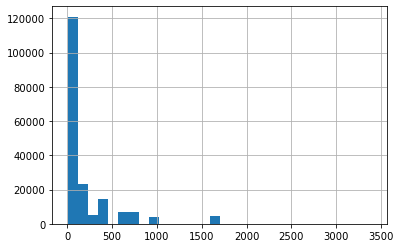

In [35]:
sales_data_new['Sales'].hist(bins=30)

A maioria dos produtos são de valores abaixo de 200 dólares.

In [36]:
df_year = sales_data_new.groupby(['Year'])
df_year.Sales.sum()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Year
2019    3.448337e+07
2020    8.670290e+03
Name: Sales, dtype: float64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


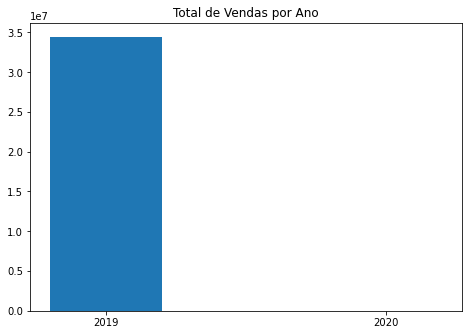

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = ['2019', '2020']
sales_year = df_year.Sales.sum()
ax.bar(year,sales_year,width=0.4)
plt.title('Total de Vendas por Ano')
plt.show()

O número de dados de vendas para o ano de 2020 são poucos em comparação com o ano de 2019 (Não chega a 1% das vendas totais). Sendo assim os valor total vendido de 2020 nem chega a aparecer direito no gráfico.

O valor total de venda de 2019 foi de aproximadamente 34 milhões de dólares.

In [38]:
sales_data_new['Sales'].describe()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Marcela\anaconda3\lib\site-packages\pandas\core\nanops.py:1558: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)


count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64

Com relação à venda, o valor máximo já feito em um pedido foi de 3400 dólares e a média dos pedidos é de 185 dólares. 

In [39]:
sales_data_new[sales_data_new['Sales'] == sales_data_new['Sales'].max()]

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Day,Time,Hour,City,State,Sales
4717,181069,Macbook Pro Laptop,2,1700.0,2019,4,27,21:01:00,21,San Francisco,CA,3400.0
5219,181544,Macbook Pro Laptop,2,1700.0,2019,4,22,12:48:00,12,New York City,NY,3400.0
6776,200528,Macbook Pro Laptop,2,1700.0,2019,5,13,13:40:00,13,Boston,MA,3400.0
385,210292,Macbook Pro Laptop,2,1700.0,2019,6,8,09:00:00,9,San Francisco,CA,3400.0


As vendas mais caras foram de MacBook Pro em em 3 meses diferentes.

In [40]:
df_month = sales_data_new[sales_data_new['Year'] == 2019].groupby(['Month'])
df_month.Sales.sum()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Month
1     1.813586e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


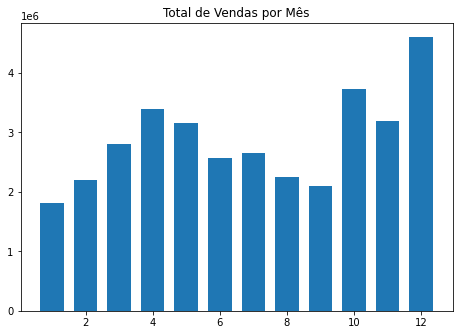

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
month = np.arange(1, 13, 1)
sales_month = df_month.Sales.sum()
ax.bar(month,sales_month,width=0.7)
plt.title('Total de Vendas por Mês')
plt.show()

Foi analisado os dados do ano de 2019 que contém a maior quantidade de dados. O mês de Dezembro foi o que mais teve venda. um total de 4 milhões de dólares. 

Dezembro é mês de Natal e preparação para o Ano Novo, muitas pessoas gostam de comprar presentes e a tendência é de alta no comércio. Esse dado pode comprovar essa teoria.

Outubro foi o segundo maior mês de vendas.

In [42]:
sales_data_new['City'].value_counts().sort_index()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: City, dtype: int64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


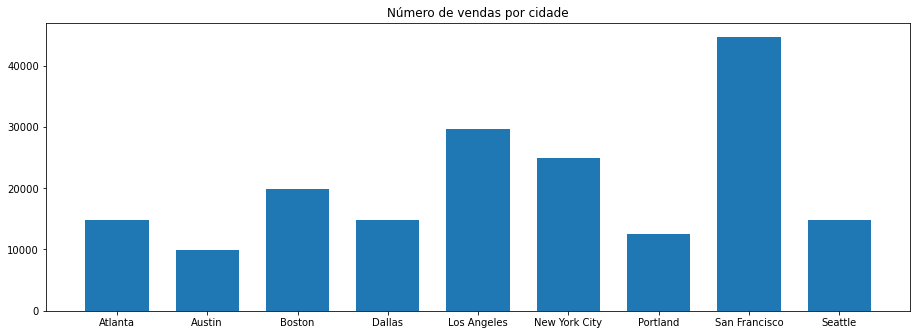

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(np.sort(sales_data_new['City'].unique()),sales_data_new['City'].value_counts().sort_index(),width=0.7)
plt.title('Número de vendas por cidade')
plt.show()

A cidade de San Francisco teve o maior número de pedidos, seguida por Los Angeles e New York. Los Angeles e New York são as cidades mais populosas dos Estados Unidos e San Francisco a mais populosa de Califórnia.

In [44]:
sales_data_new['Hour'].value_counts().head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19    12905
12    12587
11    12411
18    12280
20    12228
Name: Hour, dtype: int64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


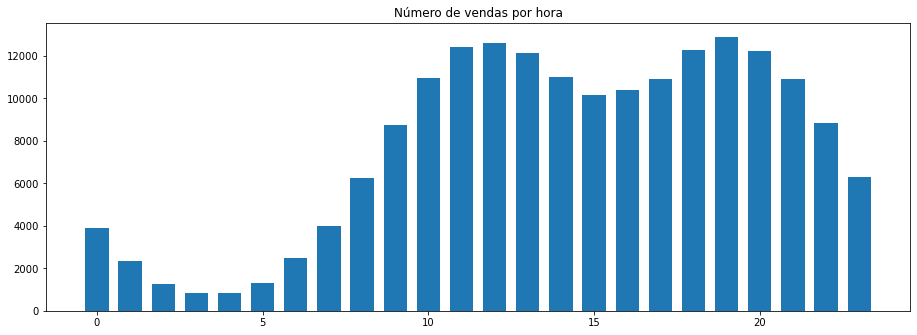

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(np.sort(sales_data_new['Hour'].unique()),sales_data_new['Hour'].value_counts().sort_index(),width=0.7)
plt.title('Número de vendas por hora')
plt.show()

In [46]:
sales_data_new['Hour'].describe()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Marcela\anaconda3\lib\site-packages\pandas\core\nanops.py:1558: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)


count    185950.000000
mean         14.413305
std           5.423416
min           0.000000
25%          11.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64

A maioria das vendas ocorrem depois das 10h da manhã até as 20h. O maior pico de vendas é as 19h, seguido pelo horário de 12h e 11h. O horário das 19h é geralmente quando as pessoas chegam do trabalho e os outros dois horários são em torno da hora de almoço, quando as pessoas ficam mais livres do serviço.

Para maximizar a venda de produtos devem ser feitos anúncios em entre as 18h e as 20h e também no horário de almoço entre 11h e 13h.

In [47]:
sales_data_new['Product'].value_counts().head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: Product, dtype: int64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


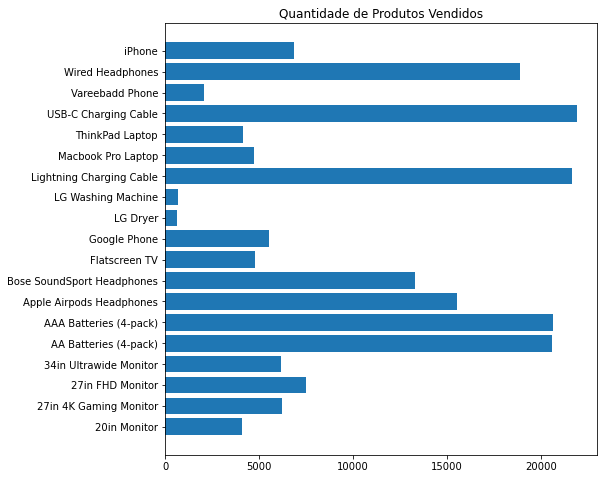

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1.5])
ax.barh(np.sort(sales_data_new['Product'].unique()),sales_data_new['Product'].value_counts().sort_index())
plt.title('Quantidade de Produtos Vendidos')
plt.show()

O cabo USB-C foi o produto mais vendido, seguido pelo cabo para carregar celular e baterias.

In [49]:
df_product = sales_data_new.groupby(['Product'])

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df_product['Price Each'].mean()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


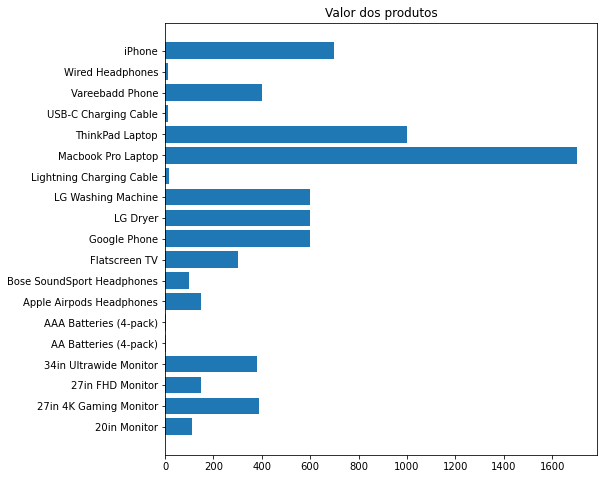

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1.5])
ax.barh(np.sort(sales_data_new['Product'].unique()),df_product['Price Each'].mean().sort_index())
plt.title('Valor dos produtos')
plt.show()

O cabo USB-C foi o produto mais vendido, seguido pelo cabo para carregar celular e baterias, como vimos anteriormente. São itens menores, com valores menores (itens mais baratos da loja) e que as pessoas usam em maior quantidade (a vida útil do objeto é menor).

a) Quanto foi vendido no ano de 2019?\
b) Qual o melhor mês para as vendas? Quanto foi vendido nesse mês?\
c) Qual a cidade com maior número de vendas?\
d) A que horas devem exibir os anúncios para maximizar a probabilidade do cliente comprar o produto?\
e) Quais produtos são mais vendidos juntos?\
f) Qual produto vende mais? Por que você achou que ele vende mais?

### Associação de produtos

In [52]:
sales_data_new.head()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Day,Time,Hour,City,State,Sales
0,141234,iPhone,1,700.00,2019,1,22,21:25:00,21,Boston,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019,1,28,14:15:00,14,Portland,OR,14.95
2,141236,Wired Headphones,2,11.99,2019,1,17,13:33:00,13,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019,1,5,20:33:00,20,Los Angeles,CA,149.99
4,141238,Wired Headphones,1,11.99,2019,1,25,11:59:00,11,Austin,TX,11.99


In [53]:
sales_data_new['Order ID'].value_counts()

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


160873    5
312407    4
277875    4
178158    4
165665    4
         ..
291538    1
163702    1
312451    1
245385    1
152696    1
Name: Order ID, Length: 178437, dtype: int64

In [54]:
sales_data_new['Product'] = sales_data_new['Product'].str.strip() #retirar os espaços em branco

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Colocar cada produto em uma coluna para fazer a associação e mudar para 0 ou 1
list_prod = (sales_data_new.groupby(['Order ID','Product'])['Quantity Ordered']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order ID'))
print(list_prod.head())

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product   20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
Order ID                                                           
141234             0.0                     0.0               0.0   
141235             0.0                     0.0               0.0   
141236             0.0                     0.0               0.0   
141237             0.0                     0.0               1.0   
141238             0.0                     0.0               0.0   

Product   34in Ultrawide Monitor  AA Batteries (4-pack)  \
Order ID                                                  
141234                       0.0                    0.0   
141235                       0.0                    0.0   
141236                       0.0                    0.0   
141237                       0.0                    0.0   
141238                       0.0                    0.0   

Product   AAA Batteries (4-pack)  Apple Airpods Headphones  \
Order ID                                       

In [56]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
products_sets = list_prod.applymap(encode_units)

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
#Exemplo como ficam os dados
products_sets[products_sets.index == '160873']

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
160873,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1


#### Itemsets frequêntes e regra de associação

In [58]:
frequent_itemsets = apriori(products_sets, min_support=0.005, use_colnames=True)
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAlgumas regras de associação geradas:\n", rules.head())
print("\nDimensões da matriz de regras:", rules.shape)

C:\Users\Marcela\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Marcela\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                              itemsets
0   0.022966                        (20in Monitor)
1   0.034886              (27in 4K Gaming Monitor)
2   0.042020                    (27in FHD Monitor)
3   0.034600              (34in Ultrawide Monitor)
4   0.115122               (AA Batteries (4-pack))
5   0.115408              (AAA Batteries (4-pack))
6   0.087005            (Apple Airpods Headphones)
7   0.074525          (Bose SoundSport Headphones)
8   0.026867                       (Flatscreen TV)
9   0.030946                        (Google Phone)
10  0.121074            (Lightning Charging Cable)
11  0.026458                  (Macbook Pro Laptop)
12  0.023123                     (ThinkPad Laptop)
13  0.122480                (USB-C Charging Cable)
14  0.011573                     (Vareebadd Phone)
15  0.105623                    (Wired Headphones)
16  0.038333                              (iPhone)
17  0.005587  (Google Phone, USB-C Charging Cable)
18  0.005666    (Lightning Char

Quem compra Google Phone tem mais chances de comprar um cabo tipo UBS-C e vice-versa. Também acontece com quem compra Iphone e o Lightning Charging Cable. Porém o suporte é bem baixo, a maioria dos produtos são vendidos separadamente.

## 6. Conclusão

A maior parte dos dados (99%) são relacionados à 2019, portanto os dados analisados correspondem a esse ano. O melhor mês de venda de produtos é Dezembro, devido ao Natal e fim de ano. 

São Francisco, Nova Iorque e Los Angeles são as cidades onde as pessoas compram mais produtos. Tem um mercado grande pois são cidades muito populosas e a chance de crescimento é alta. Porém para diversificar o mercado, pode ser uma boa ideia invertir nos outros estados para aumentar a venda e conquistar clientes novos. 

Os horários que as pessoas mais compram são entre 11h e 13h, horário de almoço e entre 18h e 20h, fim do dia em que as pessoas estão em casa. Inclusive o melhor horário de compra é as 19h. Investir em anúncios nesses horários vão atingir o público que mais compra.

Outro ponto interessante é que a maior quantidade de vendas são para produtos de pequeno valor, abaixo de 16 dólares. MacBook, ThinkPad e Iphone são os mais caros, porém vendem pouco.

### Próximas análises
Analisar quais produtos vendem mais nas cidades de menor venda para aumentar aumentar a publicidade daqueles produtos e aumentar as vendas. 

Fazer a comparação dos produtos mais caros com os produtos que mais são vendidos. Será que a quantidade de vendas dos mais caros compensam os mais baratos? 